In [1]:
# This is required first for inline plot rendering in IPython Notebooks
%matplotlib inline

In [2]:
# standard imports
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import HoltWinters.py module
import HoltWinters as hw

# Construct synthetic time series

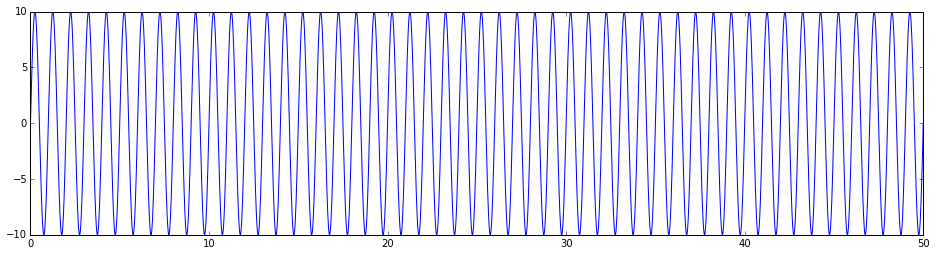

In [4]:
# first 50 "days" at 100 samples per synthetic "day"
t000to050 = np.arange(5001)
syn000to050 = 10. * np.sin(t000to050 * (2*np.pi)/100.)
plt.figure(figsize=(16,4))
plt.plot(t000to050/100., syn000to050)

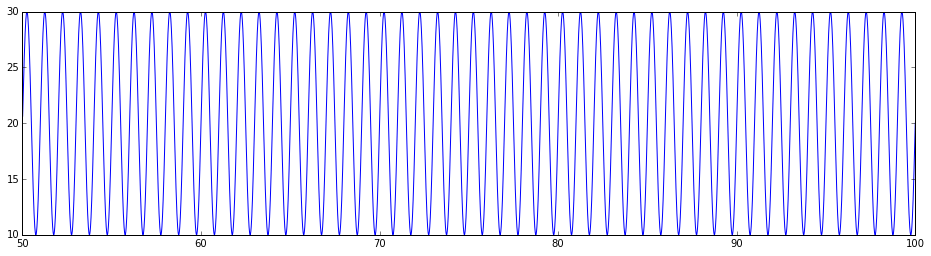

In [5]:
# next 50 "days"
t050to100 = np.arange(5001,10001)
syn050to100 = 20 + 10. * np.sin(t050to100 * (2*np.pi)/100.)
plt.figure(figsize=(16,4))
plt.plot(t050to100/100., syn050to100)

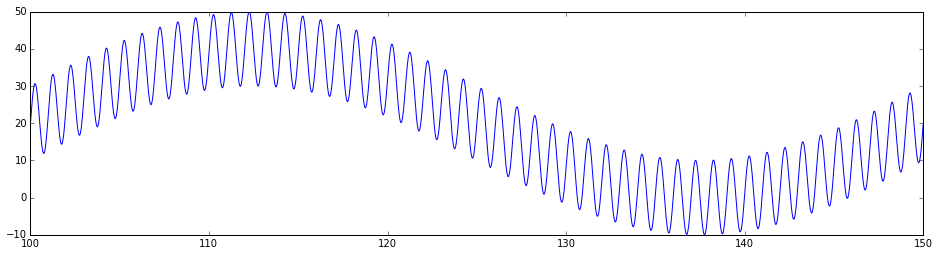

In [6]:
# next 50 "days"
t100to150 = np.arange(10001,15001)
syn100to150 = 20 + 10. * np.sin(t100to150 * (2*np.pi)/100.) + 20*np.sin(t100to150 * (2*np.pi)/5000.)
plt.figure(figsize=(16,4))
plt.plot(t100to150/100., syn100to150)

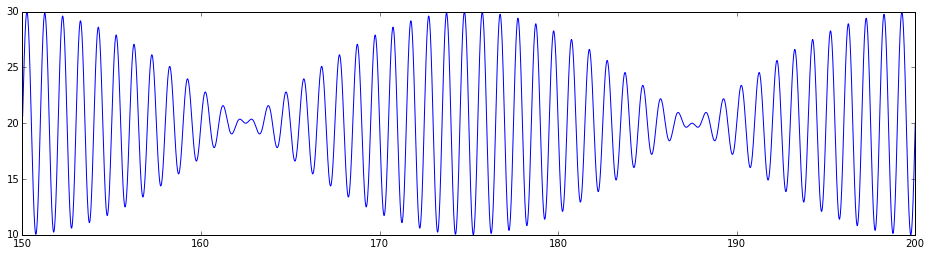

In [7]:
# next 50 "days"
t150to200 = np.arange(15001,20001)
syn150to200 = 20 + (10. * np.sin(t150to200 * (2*np.pi)/100.)) * (1*np.cos(t150to200 * (2*np.pi)/5000.))
plt.figure(figsize=(16,4))
plt.plot(t150to200/100., syn150to200)

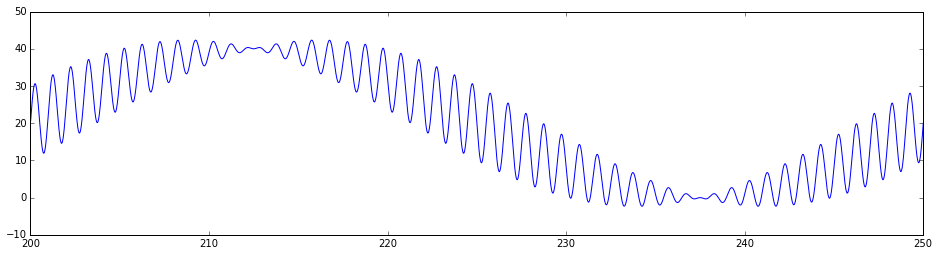

In [8]:
# next 50 "days"
t200to250 = np.arange(20001,25001)
syn200to250 = 20 + ((10. * np.sin(t200to250 * (2*np.pi)/100.)) * (1*np.cos(t200to250 * (2*np.pi)/5000.)) + 
                  20*np.sin(t200to250 * (2*np.pi)/5000.) )
plt.figure(figsize=(16,4))
plt.plot(t200to250/100., syn200to250)

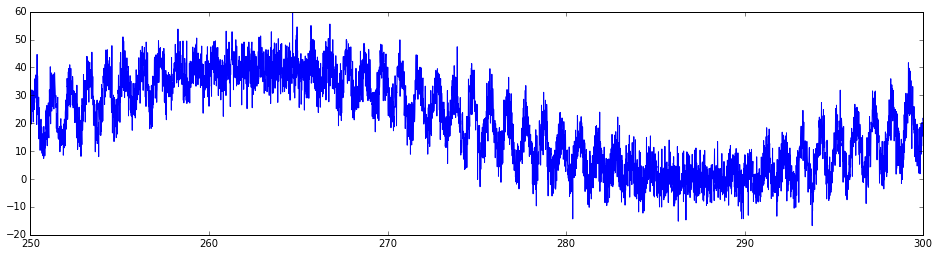

In [61]:
# next 50 "days"
t250to300 = np.arange(25001,30001)
np.random.seed(123456789)
syn250to300 = 20 + ((10. * np.sin(t250to300 * (2*np.pi)/100.)) * (1*np.cos(t250to300 * (2*np.pi)/5000.)) + 
                  20*np.sin(t250to300 * (2*np.pi)/5000.) ) + 5 * np.random.randn(5000)
plt.figure(figsize=(16,4))
plt.plot(t250to300/100., syn250to300)

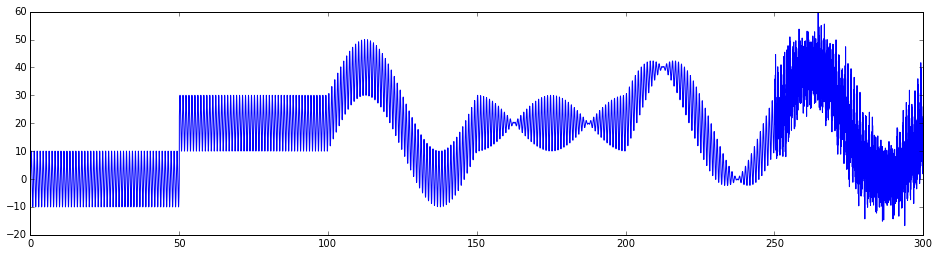

In [62]:
# all 300 "days
t000to300 = np.concatenate((t000to050,t050to100,t100to150,t150to200,t200to250, t250to300))
syn000to300 = np.concatenate((syn000to050,syn050to100,syn100to150,syn150to200,syn200to250, syn250to300))
plt.figure(figsize=(16,4))
plt.plot(t000to300/100., syn000to300)

# Apply Holt-Winters exponential smoother

In [77]:
# set up HW smoothing parameters
m = 100 # length of "day"
alpha = 1./100./3. # average age of level is 3 "days"
beta = 0 # slope doesn't change
gamma = 1./100.*100./3. # average age of "seasonal" correction is e "days"
phi = 1 # don't dampen the slope

# initialize states for HW smoother
l0 = None # this uses algorithm's default initial level
b0 = 0 # this is NOT the algorithm's default initial slope
s0 = None # this uses algorithm's default initial "seasonal" correction
sigma0 = [0] # this is NOT the algorithm's default initial standard deviation

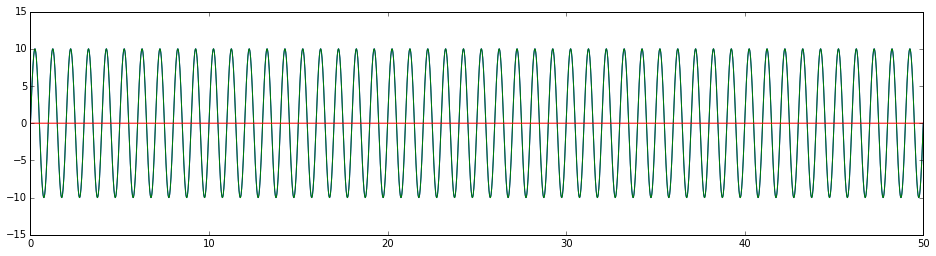

In [80]:
# first 50 "days"
(synHat000to050, sHat000to050, sigma000to050,
 syn050, s050, l050, b050, sigma050) = hw.additive(syn000to050, m, alpha, beta, gamma, phi,
                                                   yhat0=None, l0=l0, b0=b0, s0=s0, sigma0=sigma0)

plt.figure(figsize=(16,4))
plt.plot(t000to050/100., syn000to050, color='blue')
plt.plot(t000to050/100., synHat000to050, color='green')
plt.plot(t000to050/100., synHat000to050 - sHat000to050, color='red')

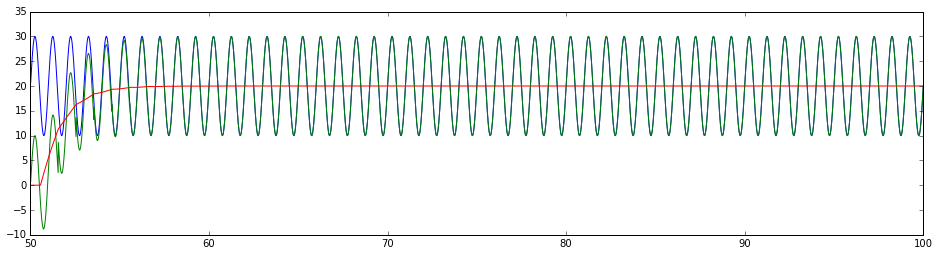

In [81]:
# next 50 "days"
(synHat050to100, sHat050to100, sigma050to100,
 syn100, s100, l100, b100, sigma100) = hw.additive(syn050to100, m, alpha, beta, gamma, phi,
                                                   yhat0=syn050, l0=l050, b0=b050, s0=s050, sigma0=sigma050)

plt.figure(figsize=(16,4))
plt.plot(t050to100/100., syn050to100, color='blue')
plt.plot(t050to100/100., synHat050to100, color='green')
plt.plot(t050to100/100., synHat050to100 - sHat050to100, color='red')

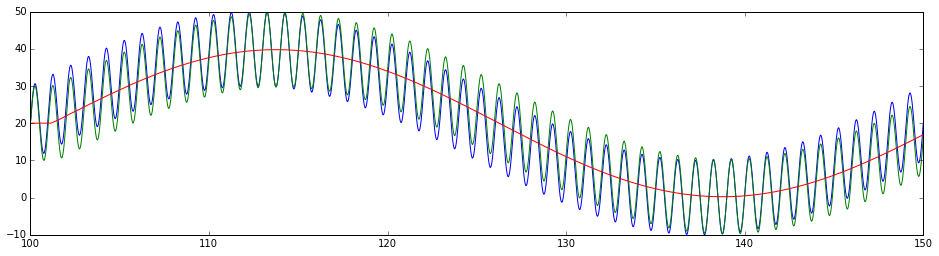

In [82]:
# next 50 "days"
(synHat100to150, sHat100to150, sigma100to150,
 syn150, s150, l150, b150, sigma150) = hw.additive(syn100to150, m, alpha, beta, gamma, phi,
                                                   yhat0=syn100, l0=l100, b0=b100, s0=s100, sigma0=sigma100)

plt.figure(figsize=(16,4))
plt.plot(t100to150/100., syn100to150, color='blue')
plt.plot(t100to150/100., synHat100to150, color='green')
plt.plot(t100to150/100., synHat100to150 - sHat100to150, color='red')

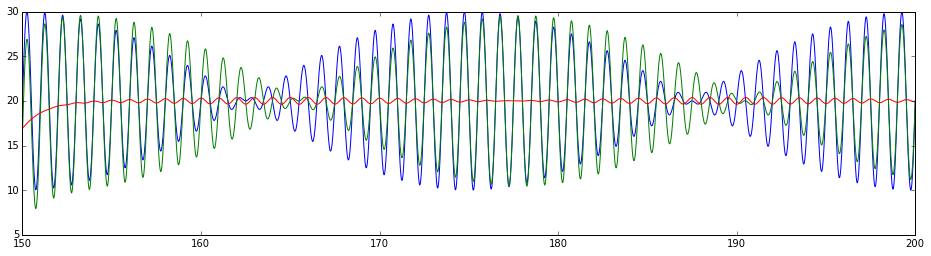

In [83]:
# next 50 "days"
(synHat150to200, sHat150to200, sigma150to200,
 syn200, s200, l200, b200, sigma200) = hw.additive(syn150to200, m, alpha, beta, gamma, phi,
                                                   yhat0=syn150, l0=l150, b0=b150, s0=s150, sigma0=sigma150)


plt.figure(figsize=(16,4))
plt.plot(t150to200/100., syn150to200, color='blue')
plt.plot(t150to200/100., synHat150to200, color='green')
plt.plot(t150to200/100., synHat150to200 - sHat150to200, color='red')

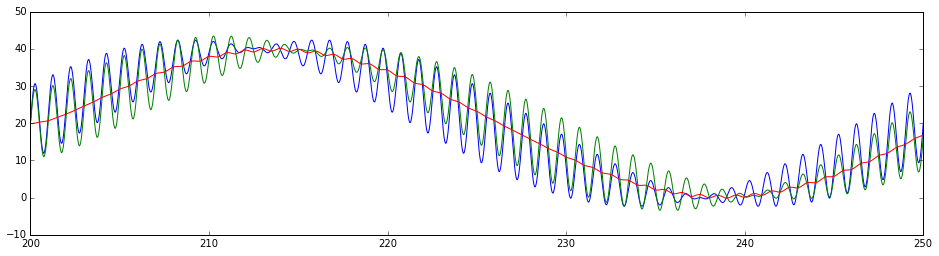

In [84]:
# next 50 "days"
(synHat200to250, sHat200to250, sigma200to250,
 syn250, s250, l250, b250, sigma250) = hw.additive(syn200to250, m, alpha, beta, gamma, phi,
                                                   yhat0=syn200, l0=l200, b0=b200, s0=s200, sigma0=sigma200)


plt.figure(figsize=(16,4))
plt.plot(t200to250/100., syn200to250, color='blue')
plt.plot(t200to250/100., synHat200to250, color='green')
plt.plot(t200to250/100., synHat200to250 - sHat200to250, color='red')

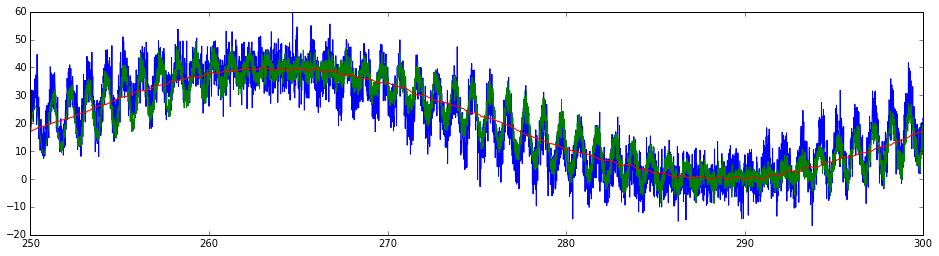

In [85]:
# next 50 "days"
(synHat250to300, sHat250to300, sigma250to300,
 syn300, s300, l300, b300, sigma300) = hw.additive(syn250to300, m, alpha, beta, gamma, phi,
                                                   yhat0=syn250, l0=l250, b0=b250, s0=s250, sigma0=sigma250)


plt.figure(figsize=(16,4))
plt.plot(t250to300/100., syn250to300, color='blue')
plt.plot(t250to300/100., synHat250to300, color='green')
plt.plot(t250to300/100., synHat250to300 - sHat250to300, color='red')